# **1.Import the Dependencies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import keras
from keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D
from keras.models import Sequential
import tensorflow_datasets as tfds
import os
from keras.preprocessing.image import array_to_img
from keras.callbacks import Callback

# ****2.Download the CIFAR10 dataset****

In [ ]:
ds = tfds.load('cifar10', split='train')

# ****3.Data visualization and data preprocessing****

In [ ]:
dataiterator = ds.as_numpy_iterator()

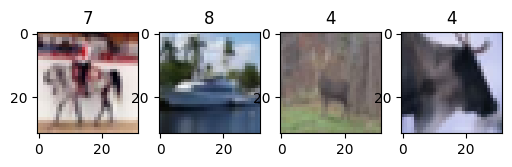

In [ ]:
fig,ax = plt.subplots(ncols=4 ,figsize=(6,6) )

for i in range(4):
    sample = dataiterator.next()
    ax[i].imshow(sample['image'])
    ax[i].title.set_text(sample['label'])

In [ ]:
def scale(img):
  img=img['image']
  return img/255

In [ ]:
ds = tfds.load('cifar10', split='train')
ds = ds.map(scale)
ds = ds.cache()
ds = ds.shuffle(50000)
ds = ds.batch(128)
ds = ds.prefetch(64)   # helps for faster fetching of data

In [ ]:
ds.as_numpy_iterator().next().shape

(128, 32, 32, 3)

# **4.Model creation**

In [ ]:
# generator model
def NN_generator():
  model = Sequential()

  model.add(Dense(8*8*128,input_dim=128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((8,8,128)))

  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(3,4,padding='same',activation='sigmoid'))
  return model

In [ ]:
generator = NN_generator()

In [ ]:
generator.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8192)                │       1,056,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 16, 16, 128)         │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 128)         │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 3)           │           6,147 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,406,915 (9.18 MB)

 Trainable params: 2,406,915 (9.18 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


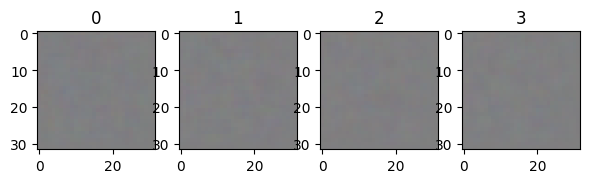

In [ ]:
img = generator.predict(np.random.randn(4,128,1))

fig , ax = plt.subplots(ncols=4,figsize=(7,7))

for idx, img in enumerate(img):
  ax[idx].imshow(np.squeeze(img))
  ax[idx].title.set_text(idx)

In [ ]:
def NN_discriminator():
  model = Sequential()

  model.add(Conv2D(32,4,input_shape=(32,32,3)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(64,4))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(128,4))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(256,4))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1,activation='sigmoid'))

  return model

In [ ]:
discriminator = NN_discriminator()

In [ ]:
discriminator.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 29, 29, 32)          │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 29, 29, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 29, 29, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 64)          │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 23, 23, 128)         │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 20, 20, 256)         │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_8 (LeakyReLU)            │ (None, 20, 20, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 20, 20, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 102400)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 102400)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │         102,401 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 792,545 (3.02 MB)

 Trainable params: 792,545 (3.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
img =img.reshape(1,32,32,3)

In [ ]:
discriminator.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 732ms/step


array([[0.5034539]], dtype=float32)

# **5.Define the Optimizer and the loss function**

In [ ]:
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy as bc

In [ ]:
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)

g_loss = bc()
d_loss = bc()

In [ ]:
from keras.models import Model

In [ ]:
class GAN(Model):
  def __init__(self,generator,discriminator,*args,**kwargs):
    super().__init__(*args,**kwargs)

    self.discriminator = discriminator
    self.generator = generator

  def compile(self,g_opt,d_opt,g_loss,d_loss,*args,**kwargs):
    super().compile(*args,**kwargs)

    self.g_opt = g_opt
    self.d_opt = d_opt
    self.g_loss = g_loss
    self.d_loss = d_loss

  def train_step(self, batch):  # the functino name should be same because of that the call error will arise
    real_img = batch
    fake_img = self.generator(tf.random.normal((128,128,1)),training=False)

    with tf.GradientTape() as d_tape:
      yhat_real = self.discriminator(real_img,training=True)
      yhat_fake = self.discriminator(fake_img,training=True)
      yhat_realfake = tf.concat([yhat_real,yhat_fake],axis=0)

      y_realfake = tf.concat([tf.zeros_like(yhat_real),tf.ones_like(yhat_fake)],axis=0)

      noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
      noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
      y_realfake += tf.concat([noise_real,noise_fake],axis=0)

      tot_d_loss = self.d_loss(y_realfake,yhat_realfake)

      dgrad = d_tape.gradient(tot_d_loss,self.discriminator.trainable_variables)
      self.d_opt.apply_gradients(zip(dgrad,self.discriminator.trainable_variables))

    with tf.GradientTape() as g_tape:
      gen_img = self.generator(tf.random.normal((128,128,1)),training=True)

      pred_labels = self.discriminator(gen_img,training=False)

      tot_g_loss = self.g_loss(tf.zeros_like(pred_labels),pred_labels)

      ggrad = g_tape.gradient(tot_g_loss,self.generator.trainable_variables)
      self.g_opt.apply_gradients(zip(ggrad,self.generator.trainable_variables))

    return {"d_loss:":tot_d_loss,"g_loss":tot_g_loss}


In [ ]:
gan = GAN(generator,discriminator)

In [ ]:
gan.compile(g_opt,d_opt,g_loss,d_loss)

# 6. **use Callback** to store the image produces during each epocs

In [ ]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))

In [ ]:
hist = gan.fit(ds, epochs=20,callbacks=[ModelMonitor()])

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 141s 360ms/step - d_loss:: 0.4665 - g_loss: 0.1847
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 150s 382ms/step - d_loss:: 0.2942 - g_loss: 0.0078
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 201s 378ms/step - d_loss:: 0.2944 - g_loss: 0.0137
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 201s 376ms/step - d_loss:: 0.5442 - g_loss: 0.2714
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 150s 384ms/step - d_loss:: 0.2847 - g_loss: 0.0650
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 148s 379ms/step - d_loss:: 0.4851 - g_loss: 0.2615
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 198s 370ms/step - d_loss:: 0.2742 - g_loss: 0.0189
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 201s 367ms/step - d_loss:: 0.2727 - g_loss: 0.0251
Epoch 9/20


# **7.Performance**

In [ ]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'], label='d_loss')
plt.plot(hist.history['g_loss'], label='g_loss')
plt.legend()
plt.show()